In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spotify_file = "../Datasets/songs_normalize.csv"

songs_df = pd.read_csv(spotify_file)
songs_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [2]:
songs_df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [3]:
df_sort_genres= songs_df["artist"].value_counts()

df_sort_genres

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Lil Uzi Vert       1
Lil Jon            1
Hilltop Hoods      1
Shinedown          1
Guy Sebastian      1
Name: artist, Length: 835, dtype: int64

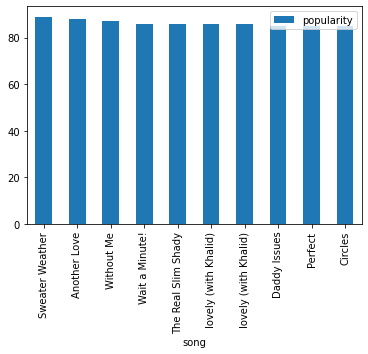

In [4]:

# # plot the top 10 songs by popularity
songs_df.sort_values("popularity", ascending=False).head(10).plot(kind="bar", x="song", y="popularity")


In [5]:
# find the top 10 least popular songs
least_popular_songs = songs_df.sort_values("popularity").head(10)
# add the columns for artist and danceability
least_popular_songs = least_popular_songs[["song", "artist", "danceability"]]
# print the data frame
print(least_popular_songs)

                              song                  artist  danceability
860                  Touch My Body            Mariah Carey         0.715
1626                           Sex             Cheat Codes         0.510
1617                 Hurts So Good                Astrid S         0.672
778                    We Fly High               Jim Jones         0.685
1750                          DNA.          Kendrick Lamar         0.636
1751  Drowning (feat. Kodak Black)  A Boogie Wit da Hoodie         0.839
1922                      Mad Love                   Mabel         0.631
1602                 Love Yourself           Justin Bieber         0.609
1600                       Starboy              The Weeknd         0.681
835                  See You Again             Miley Cyrus         0.692


In [6]:
# plot a bar plot for each top artist

for artist in top_artists.index:
    artist_df = songs_df[songs_df["artist"] == artist]
    artist_df.plot(kind="bar", x="song", y="popularity")
    plt.title(artist, fontsize=20)
    plt.xlabel("Song", fontsize=16)
    plt.ylabel("Popularity", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

NameError: name 'top_artists' is not defined

In [29]:
genre_filtered_df = songs_df.loc[(songs_df['genre'] == "pop") | (songs_df['genre'] == "hip hop") | (songs_df['genre'] == "rock")].copy()

genre_filtered_df['genre'] = genre_filtered_df["genre"].replace({"pop": 0, "hip hop": 1, "rock": 2})
genre_filtered_df['genre'].value_counts()

0    428
1    124
2     58
Name: genre, dtype: int64

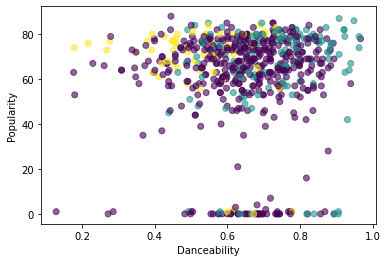

In [33]:
x_axis = genre_filtered_df["danceability"]
y_axis = genre_filtered_df['popularity']


plt.scatter(x_axis, y_axis, marker ="o", c = genre_filtered_df['genre'], alpha=0.6, edgecolors="black")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
    

    
plt.show()                                                    

In [39]:
data_1.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,0
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,0
10,Gigi D'Agostino,L'Amour Toujours,238759,False,2011,1,0.617,0.728,7,-7.932,1,0.0292,0.0328,0.048200,0.3600,0.808,139.066,0
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,268863,False,1999,56,0.745,0.958,7,-9.664,1,0.0287,0.0813,0.324000,0.5330,0.960,129.962,0
12,Bomfunk MC's,Freestyler,306333,False,2000,55,0.822,0.922,11,-5.798,0,0.0989,0.0291,0.325000,0.2520,0.568,163.826,0


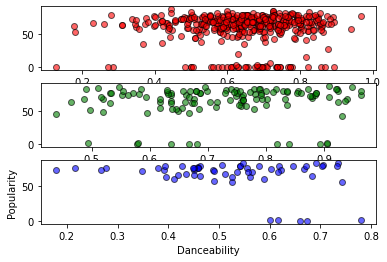

In [45]:
data_1 = genre_filtered_df[genre_filtered_df['genre'] == 0].copy()
data_2 = genre_filtered_df[genre_filtered_df['genre'] == 1].copy()
data_3 = genre_filtered_df[genre_filtered_df['genre'] == 2].copy()

ax,(fig1, fig2, fig3)= plt.subplots(3)

fig1.scatter(data_1["danceability"], data_1["popularity"], marker ="o", c = "red", alpha=0.6, edgecolors="black")
fig2.scatter(data_2["danceability"], data_2["popularity"], marker ="o", c = "green", alpha=0.6, edgecolors="black")
fig3.scatter(data_3["danceability"], data_3["popularity"], marker ="o", c = "blue", alpha=0.6, edgecolors="black")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
    

    
plt.show() 

In [ ]:
plt.title("Popularity vs Danceability")
plt.xlabel("Danceability")
plt.ylabel("Popularity")

plt.scatter(x_axis, times, marker="o", color="red")
plt.show()